In [1]:
import pandas as pd
df=pd.read_csv('Glass_Dataset.csv')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df.columns

Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs'],
      dtype='object')

In [29]:
overall_specs_rate = df['Wear Specs'].mean() * 100
print(f" Overall: {overall_specs_rate:.2f}% of people wear specs")


 Overall: 54.81% of people wear specs


In [4]:
country_stats = df.groupby('Country')['Wear Specs'].agg(['mean', 'count']).reset_index()
country_stats.columns = ['Country', 'Specs_Percentage', 'Total_Respondents']

country_stats['Specs_Percentage'] = (country_stats['Specs_Percentage'] * 100).round(1)

country_stats = country_stats.sort_values(by='Specs_Percentage', ascending=False)

print(country_stats)


  Country  Specs_Percentage  Total_Respondents
3     KOR              64.3                987
2     JPN              60.9                363
0     CAN              57.9                881
1     IND              40.3                989


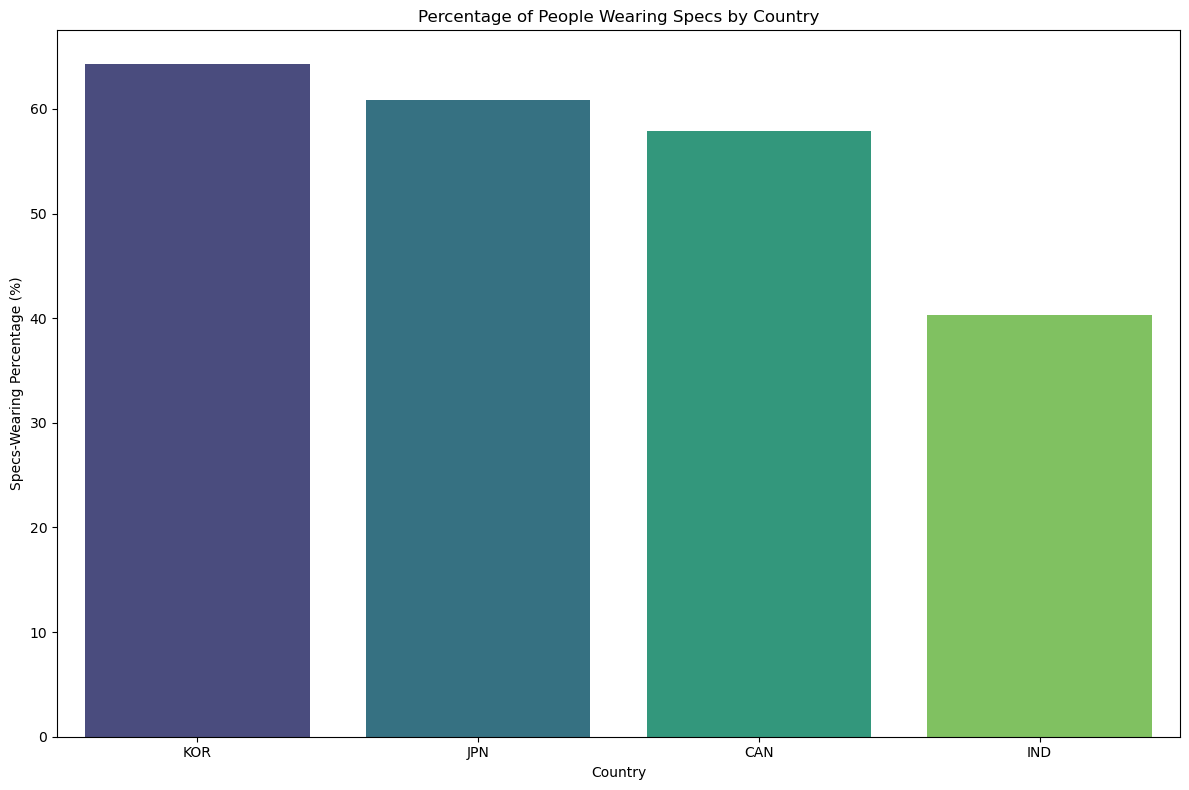

In [5]:
country_stats = df.groupby('Country')['Wear Specs'].agg(['mean', 'count']).reset_index()
country_stats.columns = ['Country', 'Specs_Percentage', 'Total_Respondents']
country_stats['Specs_Percentage'] = (country_stats['Specs_Percentage'] * 100).round(1)

country_stats = country_stats.sort_values(by='Specs_Percentage', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=country_stats, x='Country', y='Specs_Percentage', palette='viridis')
plt.title('Percentage of People Wearing Specs by Country')
plt.ylabel('Specs-Wearing Percentage (%)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

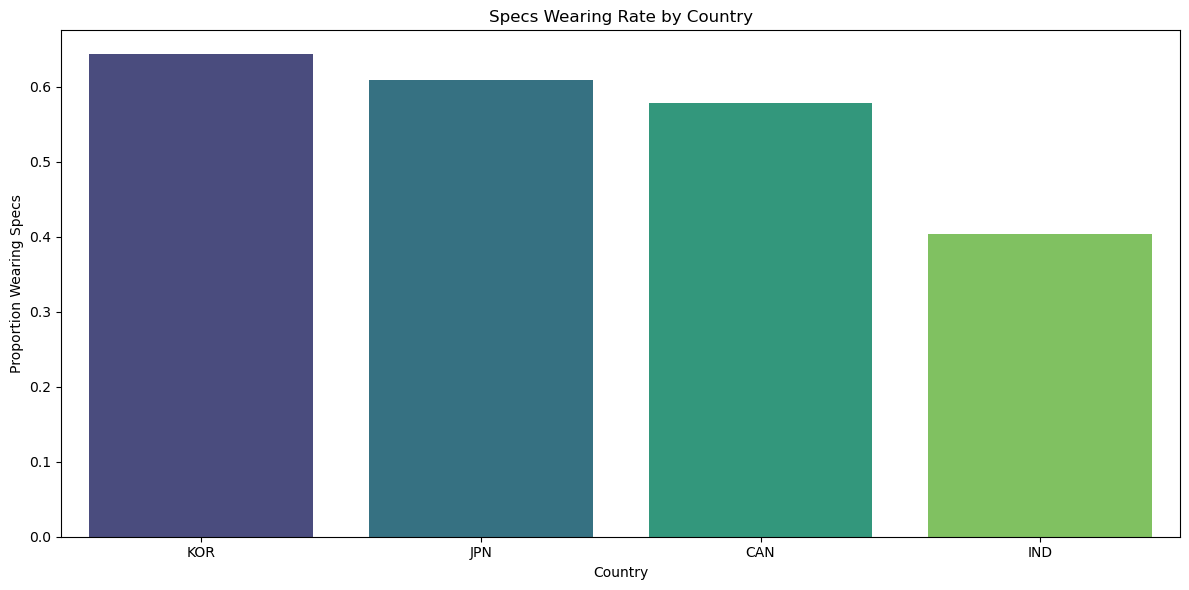

In [6]:
country_spec_rate = df.groupby('Country')['Wear Specs'].mean().dropna().sort_values(ascending=False)
country_counts = df['Country'].value_counts().loc[country_spec_rate.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=country_spec_rate.index, y=country_spec_rate.values, palette="viridis")
plt.title("Specs Wearing Rate by Country")
plt.xlabel("Country")
plt.ylabel("Proportion Wearing Specs")
plt.tight_layout()
plt.show()




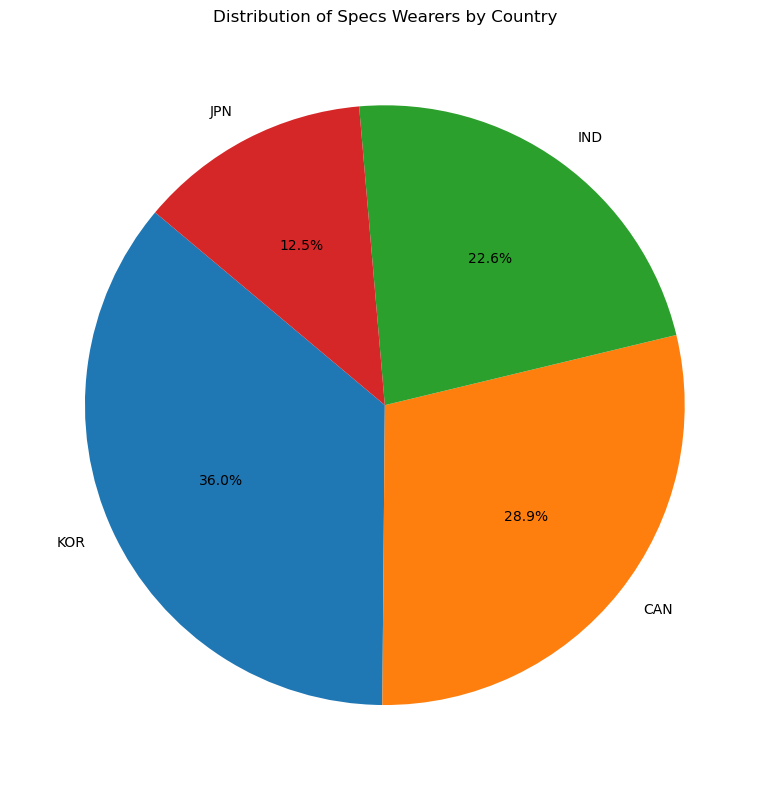

In [7]:
specs_by_country = df[df["Wear Specs"] == 1]["Country"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(specs_by_country, labels=specs_by_country.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Specs Wearers by Country")
plt.tight_layout()
plt.show()

In [8]:
correlation = df.corr(numeric_only=True)["Wear Specs"].sort_values(ascending=False)
print("Correlation with 'Wear Specs':\n", correlation)

Correlation with 'Wear Specs':
 Wear Specs                                                 1.000000
Time spent watching videos/TV                              0.342571
Age                                                        0.221421
Drinks alcohol                                             0.205002
Whether parents have specs                                 0.190556
Total Time spent working in front of screen                0.139592
Has Diabetes                                               0.126125
Wants to change career                                     0.115028
IQ                                                         0.094692
Annual Family Income ($)                                   0.089451
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0.083085
Smoker                                                     0.063791
Has debt                                                   0.059074
Time spent playing indoor sports                           0.048289
Education Status

In [9]:
strong_predictors = correlation[(correlation > 0.1) & (correlation.index != "Wear Specs")].index

cutoffs = []

for country in df['Country'].dropna().unique():
    country_df = df[df['Country'] == country]
    for col in strong_predictors:
        col_values = country_df[col].dropna().unique()
        for t in sorted(col_values):
            percent_with_specs = country_df[country_df[col] >= t]["Wear Specs"].mean()
            if percent_with_specs >= 0.7:
                cutoffs.append({"Country": country, "Column": col, "Cutoff_70%+": t})
                break
                


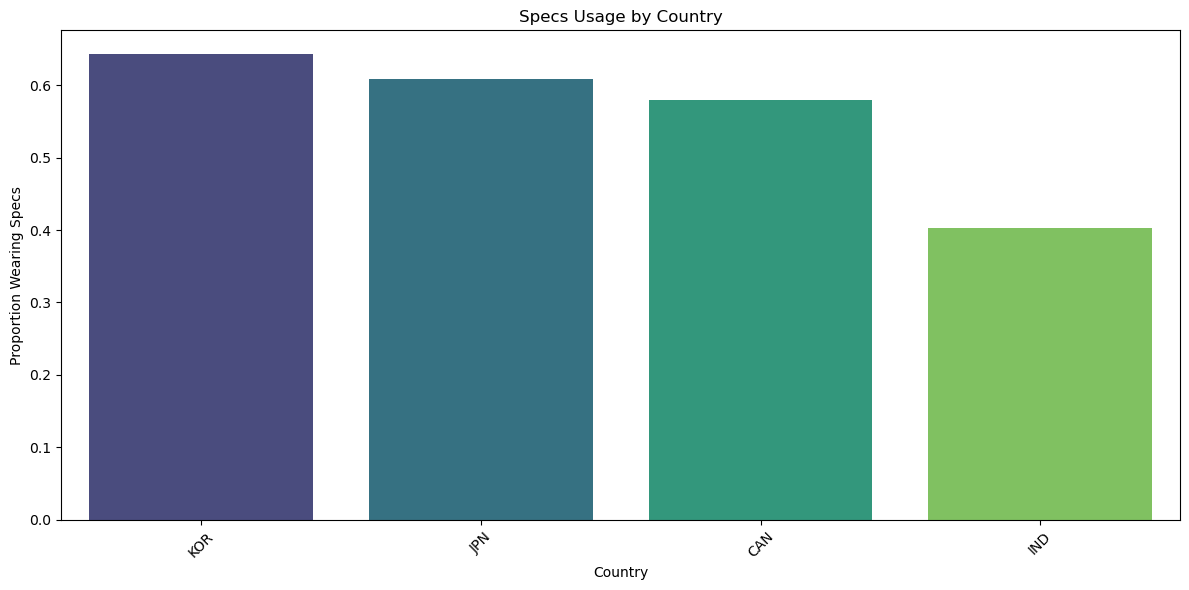

In [10]:
spec_rate = df.groupby("Country")["Wear Specs"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=spec_rate.index, y=spec_rate.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Proportion Wearing Specs")
plt.title("Specs Usage by Country")
plt.tight_layout()
plt.show()

In [11]:
for item in cutoffs:
    if item["Country"] != "India":
        feature = item["Column"]
        cutoff = item["Cutoff_70%+"]
        
        india_actual = df[df["Country"] == "India"]["Wear Specs"].mean()
        india_estimated = df[(df["Country"] == "India") & (df[feature] >= cutoff)]["Wear Specs"].mean()
        total_affected = df[(df["Country"] == "India") & (df[feature] >= cutoff)].shape[0]

        print(f"\nFeature: {feature}")
        print(f"Cutoff: {cutoff} (from {item['Country']})")
        print(f"India actual specs rate: {india_actual:.2%}")
        print(f"India estimated specs rate (if {feature} >= {cutoff}): {india_estimated:.2%}")
        print(f"Number of people in India above cutoff: {total_affected}")



Feature: Time spent watching videos/TV
Cutoff: 4.0 (from CAN)
India actual specs rate: nan%
India estimated specs rate (if Time spent watching videos/TV >= 4.0): nan%
Number of people in India above cutoff: 0

Feature: Age
Cutoff: 51.0 (from CAN)
India actual specs rate: nan%
India estimated specs rate (if Age >= 51.0): nan%
Number of people in India above cutoff: 0

Feature: Whether parents have specs
Cutoff: 1.0 (from CAN)
India actual specs rate: nan%
India estimated specs rate (if Whether parents have specs >= 1.0): nan%
Number of people in India above cutoff: 0

Feature: Has Diabetes
Cutoff: 1.0 (from CAN)
India actual specs rate: nan%
India estimated specs rate (if Has Diabetes >= 1.0): nan%
Number of people in India above cutoff: 0

Feature: Time spent watching videos/TV
Cutoff: 5.0 (from IND)
India actual specs rate: nan%
India estimated specs rate (if Time spent watching videos/TV >= 5.0): nan%
Number of people in India above cutoff: 0

Feature: Age
Cutoff: 64.0 (from IND)
In

C:\Users\vighnesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


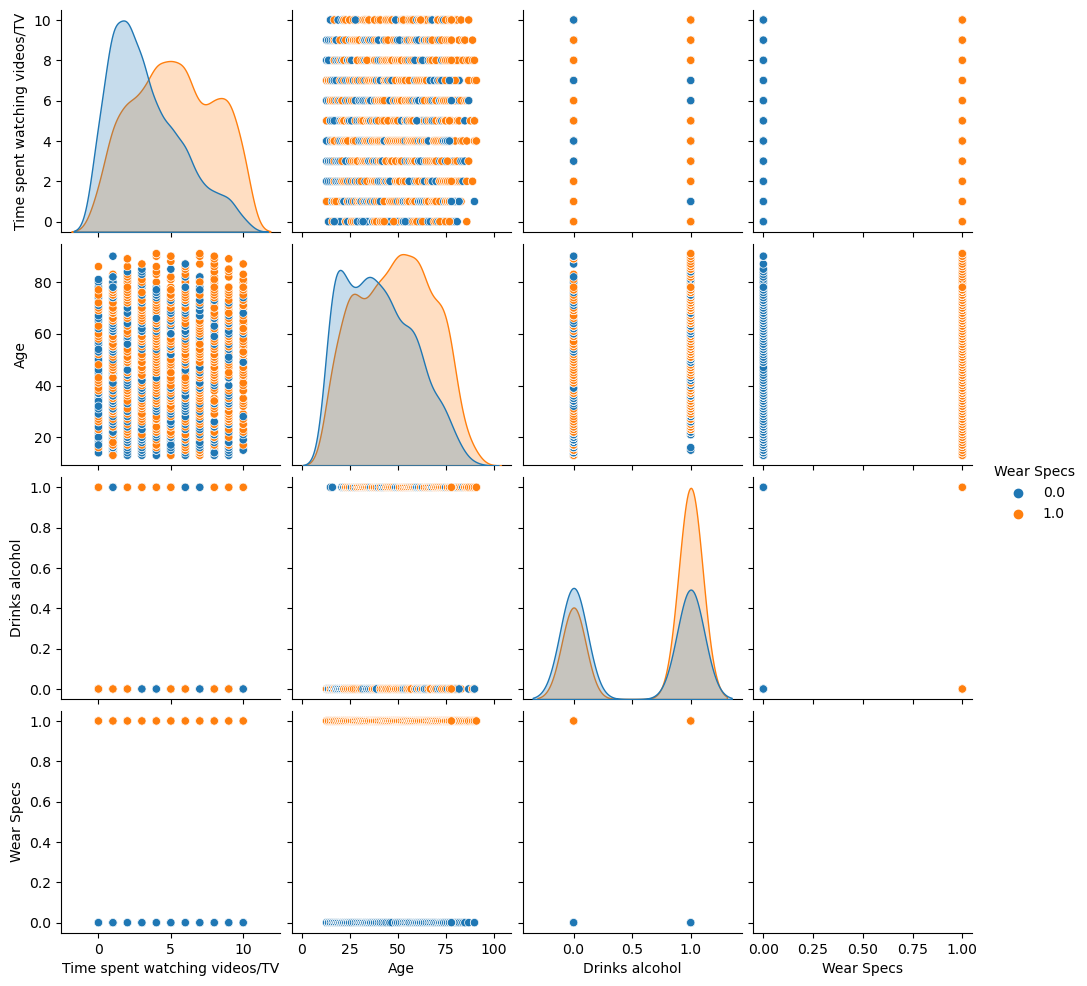

<Figure size 640x480 with 0 Axes>

In [12]:
sns.pairplot(df, vars=strong_predictors[:3].tolist() + ["Wear Specs"], hue="Wear Specs")
plt.show()
plt.tight_layout()


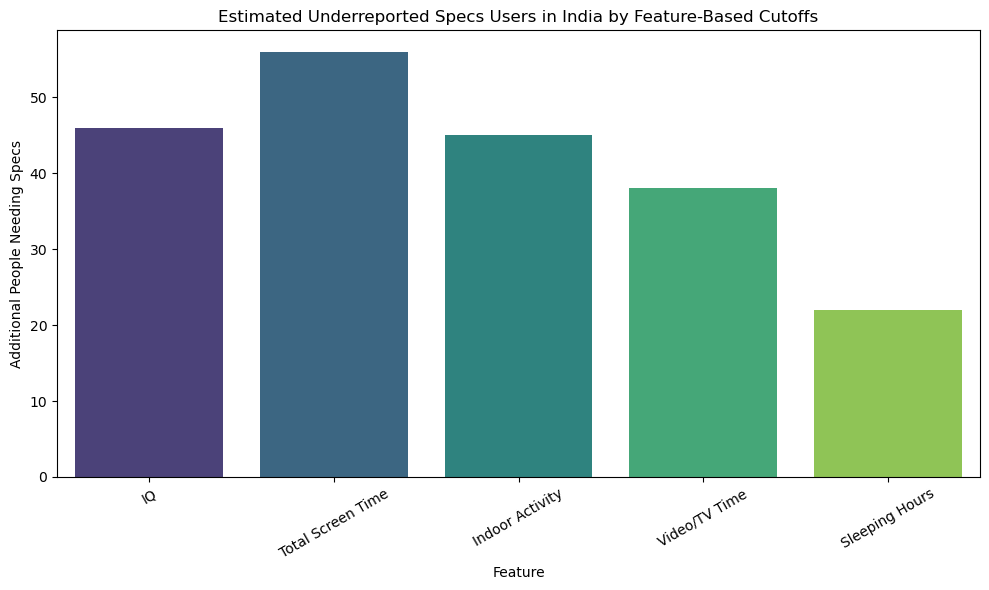

In [13]:
results_df = pd.DataFrame([
    {"Feature": "IQ", "Additional Needed": 46},
    {"Feature": "Total Screen Time", "Additional Needed": 56},
    {"Feature": "Indoor Activity", "Additional Needed": 45},
    {"Feature": "Video/TV Time", "Additional Needed": 38},
    {"Feature": "Sleeping Hours", "Additional Needed": 22},
])

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Feature", y="Additional Needed", palette="viridis")
plt.title("Estimated Underreported Specs Users in India by Feature-Based Cutoffs")
plt.ylabel("Additional People Needing Specs")
plt.xlabel("Feature")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [31]:
import numpy as np
target_col="Wear Specs"
df[target_col] = df[target_col].astype(int)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove(target_col)

correlations = df[num_cols + [target_col]].corr()[target_col].drop(target_col)
strong_corr_cols = correlations[correlations.abs() >= 0.1].index.tolist()

cutoff_results = []

for col in strong_corr_cols:
    if df[col].nunique() <= 5:
        continue  

    non_india = df[df["Country"] != "IND"]
    india_df = df[df["Country"] == "IND"]

    sorted_vals = sorted(non_india[col].dropna().unique())
    cutoff = None
    for t in sorted_vals:
        spec_rate = non_india[non_india[col] >= t][target_col].mean()
        if spec_rate >= 0.7:
            cutoff = t
            break

    if cutoff is not None:
        india_above_cutoff = india_df[india_df[col] >= cutoff]
        n_india = len(india_above_cutoff)

        if n_india > 0:
            actual_rate = india_above_cutoff[target_col].mean()
            expected_rate = non_india[non_india[col] >= cutoff][target_col].mean()

            expected_specs = expected_rate * n_india
            actual_specs = actual_rate * n_india
            additional_needed = max(0, round(expected_specs - actual_specs))

            cutoff_results.append({
                "Feature": col,
                "Cutoff": cutoff,
                "People in India (above cutoff)": n_india,
                "Expected Rate": round(expected_rate, 2),
                "Actual Rate": round(actual_rate, 2),
                "Additional Needed": additional_needed
            })


cutoff_summary_df = pd.DataFrame(cutoff_results)
cutoff_summary_df.sort_values(by="Additional Needed", ascending=False, inplace=True)

cutoff_summary_df.reset_index(drop=True, inplace=True)
cutoff_summary_df

,Feature,Cutoff,People in India (above cutoff),Expected Rate,Actual Rate,Additional Needed
0,Time spent watching videos/TV,4.0,490,0.70,0.64,33
1,Age,57.0,147,0.70,0.59,16
2,Total Time spent working in front of screen,15.0,5,0.72,1.00,0


In [36]:
df_india = df[df['Country'] == 'IND']
df_other = df[df['Country'] != 'IND']

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "Wear Specs"]

additional_needed_total = 0
details = []

for col in numeric_cols:
    if df_other[col].nunique() < 5:
        continue

    other_sorted = sorted(df_other[col].dropna().unique())
    high_cutoff = None
    for val in other_sorted:
        percent = df_other[df_other[col] >= val]["Wear Specs"].mean()
        if percent >= 0.7:
            high_cutoff = val
            break
    if high_cutoff is None:
        continue

    india_subset = df_india[df_india[col] >= high_cutoff]
    if len(india_subset) == 0:
        continue

    india_actual_rate = india_subset["Wear Specs"].mean()
    india_expected_rate = df_other[df_other[col] >= high_cutoff]["Wear Specs"].mean()

    n_at_risk = len(india_subset)
    expected_specs = india_expected_rate * n_at_risk
    actual_specs = india_actual_rate * n_at_risk

    additional_needed = round(expected_specs - actual_specs)
    additional_needed = max(0, additional_needed)  

    additional_needed_total += additional_needed

    details.append({
        "Feature": col,
        "Cutoff (Other Countries)": high_cutoff,
        "Expected Rate": round(india_expected_rate, 2),
        "India Actual Rate": round(india_actual_rate, 2),
        "People in India in Range": n_at_risk,
        "Additional Specs Users (Estimated)": additional_needed
    })

summary_df = pd.DataFrame(details)
summary_df = summary_df.sort_values(by="Additional Specs Users (Estimated)", ascending=False)

print("\n Estimated Additional People in India Who Would Wear Specs With Accurate Reporting:\n")
print(summary_df)
print(f"\n TOTAL Estimated Additional Specs Users in India: {additional_needed_total:,}")



 Estimated Additional People in India Who Would Wear Specs With Accurate Reporting:

                                       Feature  Cutoff (Other Countries)  \
2                Time spent watching videos/TV                       4.0   
1                                          Age                      57.0   
0                                    Unique ID                 9680555.0   
3  Total Time spent working in front of screen                      15.0   

   Expected Rate  India Actual Rate  People in India in Range  \
2           0.70               0.64                       490   
1           0.70               0.59                       147   
0           0.70               0.39                        28   
3           0.72               1.00                         5   

   Additional Specs Users (Estimated)  
2                                  33  
1                                  16  
0                                   9  
3                                   0  

 TOTAL

# After thorough processing we have found that 58 more people need specs in india if accurate eye reporting is performed 

In [53]:
percent=df[(df['Country'] == 'IND')]

In [54]:
percent1=percent[percent["Wear Specs"]==0]

In [55]:
print(len(percent1))

590


In [56]:
additional_percent=len(percent)/additional_needed_total

In [59]:
print("TOTAL Estimated Percent of People who would Wear Specs in India:",additional_percent)

TOTAL Estimated Percent of People who would Wear Specs in India: 17.051724137931036


# Here we can say that if proper Eye Testing is performed then 17% of people who are not wearing specs will be Wearing Specs that will increase total number of people wearing specs in India Much more